## Bibliotecas

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf 
import datetime as datetime
import seaborn as sns

In [2]:
plt.style.use('ggplot')

## Buscando dados - Selic

Link: http://api.bcb.gov.br/dados/serie/bcdata.sgs.11/dados?formato=json

In [20]:
html = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.432/dados?formato=json'

In [21]:
selic_meta = pd.read_json(html)
selic_meta.tail()

,data,valor
8408,12/03/2022,10.75
8409,13/03/2022,10.75
8410,14/03/2022,10.75
8411,15/03/2022,10.75
8412,16/03/2022,10.75


Ageitando a base de dados

In [22]:
selic_meta.data = pd.to_datetime(selic_meta.data, dayfirst=True)

In [23]:
selic_meta.set_index('data', inplace=True)
selic_meta.tail()

,valor
data,
2022-03-12,10.75
2022-03-13,10.75
2022-03-14,10.75
2022-03-15,10.75
2022-03-16,10.75


In [24]:
filtro_selic = selic_meta[selic_meta.index >= '2020-01-01']
filtro_selic.tail()

,valor
data,
2022-03-12,10.75
2022-03-13,10.75
2022-03-14,10.75
2022-03-15,10.75
2022-03-16,10.75


In [25]:
filtro_selic.isna().sum()

valor    0
dtype: int64

In [26]:
print(len(filtro_selic))

806


Visualização - Selic

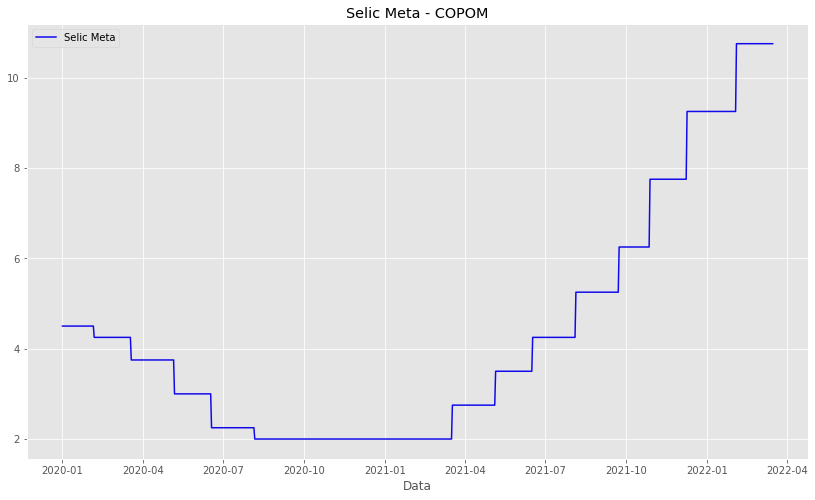

In [27]:
#selic_meta.plot()

plt.figure(figsize=(14, 8));
plt.title('Selic Meta - COPOM');
plt.plot(filtro_selic, label='Selic Meta', color='#1109eb');
plt.xlabel('Data');
plt.legend(loc=2);

## Buascando dados - Varejo

In [28]:
tickers = ['CRFB3.SA', 'VIVA3.SA', 'ARZZ3.SA', 'CEAB3.SA', 
           'LREN3.SA', 'MGLU3.SA', 'VIIA3.SA', 'SBFG3.SA']

In [29]:
inicio = datetime.datetime(2020, 1, 1)
#fim = datetime.datetime(2020, 1, 1)

In [30]:
empresas = pd.DataFrame()

for i in tickers:
    empresas[i] = yf.download(i, start=inicio, interval='1d')['Adj Close']
    
empresas

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,CRFB3.SA,VIVA3.SA,ARZZ3.SA,CEAB3.SA,LREN3.SA,MGLU3.SA,VIIA3.SA,SBFG3.SA
Date,,,,,,,,
2020-01-02,22.310835,28.686853,62.627399,18.100000,55.217422,12.029735,11.73,37.430000
2020-01-03,22.888884,28.509895,61.735661,18.000000,54.833302,11.922436,11.48,37.970001
2020-01-06,21.891283,28.008514,61.353489,17.809999,54.785282,11.932189,11.48,38.000000
2020-01-07,21.760756,27.428486,61.637672,17.180000,54.756470,11.898048,11.65,38.650002
2020-01-08,21.350525,27.477642,60.755733,16.270000,55.111794,12.263843,11.60,38.650002
...,...,...,...,...,...,...,...,...
2022-02-18,17.400000,26.299999,83.199997,5.690000,27.600000,6.360000,3.94,22.530001
2022-02-21,17.360001,25.910000,79.709999,5.390000,26.370001,6.020000,3.76,21.639999
2022-02-22,18.209999,26.469999,82.389999,5.360000,25.930000,6.070000,3.87,22.270000


Ageitando a base de dados

In [31]:
empresas.isna().sum()

CRFB3.SA    0
VIVA3.SA    0
ARZZ3.SA    0
CEAB3.SA    0
LREN3.SA    0
MGLU3.SA    0
VIIA3.SA    0
SBFG3.SA    0
dtype: int64

In [32]:
print(len(empresas['CRFB3.SA']))

534


## Mapa de calor 

In [53]:
empresas['Selic'] = filtro_selic
empresas.tail()

,CRFB3.SA,VIVA3.SA,ARZZ3.SA,CEAB3.SA,LREN3.SA,MGLU3.SA,VIIA3.SA,SBFG3.SA,Selic
Date,,,,,,,,,
2022-02-18,17.400000,26.299999,83.199997,5.69,27.600000,6.36,3.94,22.530001,10.75
2022-02-21,17.360001,25.910000,79.709999,5.39,26.370001,6.02,3.76,21.639999,10.75
2022-02-22,18.209999,26.469999,82.389999,5.36,25.930000,6.07,3.87,22.270000,10.75
2022-02-23,17.920000,26.790001,82.430000,5.31,25.700001,5.91,3.82,23.280001,10.75
2022-02-24,18.299999,26.160000,81.860001,5.27,25.510000,6.12,3.91,23.350000,10.75


In [54]:
ret_simples =  (empresas / empresas.shift())
ret_simples.dropna(axis=0, inplace=True)
ret_simples

,CRFB3.SA,VIVA3.SA,ARZZ3.SA,CEAB3.SA,LREN3.SA,MGLU3.SA,VIIA3.SA,SBFG3.SA,Selic
Date,,,,,,,,,
2020-01-03,1.025909,0.993831,0.985761,0.994475,0.993043,0.991081,0.978687,1.014427,1.0
2020-01-06,0.956415,0.982414,0.993810,0.989444,0.999124,1.000818,1.000000,1.000790,1.0
2020-01-07,0.994037,0.979291,1.004632,0.964627,0.999474,0.997139,1.014808,1.017105,1.0
2020-01-08,0.981148,1.001792,0.985692,0.947031,1.006489,1.030744,0.995708,1.000000,1.0
2020-01-09,1.021834,1.016100,0.988710,0.965581,0.992333,1.035593,1.005172,1.006468,1.0
...,...,...,...,...,...,...,...,...,...
2022-02-18,1.016949,1.008822,0.993196,1.014260,1.013588,0.959276,0.982544,0.996021,1.0
2022-02-21,0.997701,0.985171,0.958053,0.947276,0.955435,0.946541,0.954315,0.960497,1.0
2022-02-22,1.048963,1.021613,1.033622,0.994434,0.983314,1.008306,1.029255,1.029113,1.0


In [55]:
corr = ret_simples.corr()
corr

,CRFB3.SA,VIVA3.SA,ARZZ3.SA,CEAB3.SA,LREN3.SA,MGLU3.SA,VIIA3.SA,SBFG3.SA,Selic
CRFB3.SA,1.000000,0.353173,0.283294,0.312033,0.383735,0.361264,0.320558,0.332128,-0.064633
VIVA3.SA,0.353173,1.000000,0.624089,0.658521,0.684786,0.497542,0.595829,0.688764,-0.061589
ARZZ3.SA,0.283294,0.624089,1.000000,0.632920,0.674131,0.543652,0.565133,0.640492,-0.018862
CEAB3.SA,0.312033,0.658521,0.632920,1.000000,0.698609,0.502119,0.600368,0.697986,-0.044757
LREN3.SA,0.383735,0.684786,0.674131,0.698609,1.000000,0.526912,0.556899,0.686838,-0.026209
MGLU3.SA,0.361264,0.497542,0.543652,0.502119,0.526912,1.000000,0.697074,0.528713,-0.094875
VIIA3.SA,0.320558,0.595829,0.565133,0.600368,0.556899,0.697074,1.000000,0.622121,-0.039946
SBFG3.SA,0.332128,0.688764,0.640492,0.697986,0.686838,0.528713,0.622121,1.000000,-0.063677
Selic,-0.064633,-0.061589,-0.018862,-0.044757,-0.026209,-0.094875,-0.039946,-0.063677,1.000000


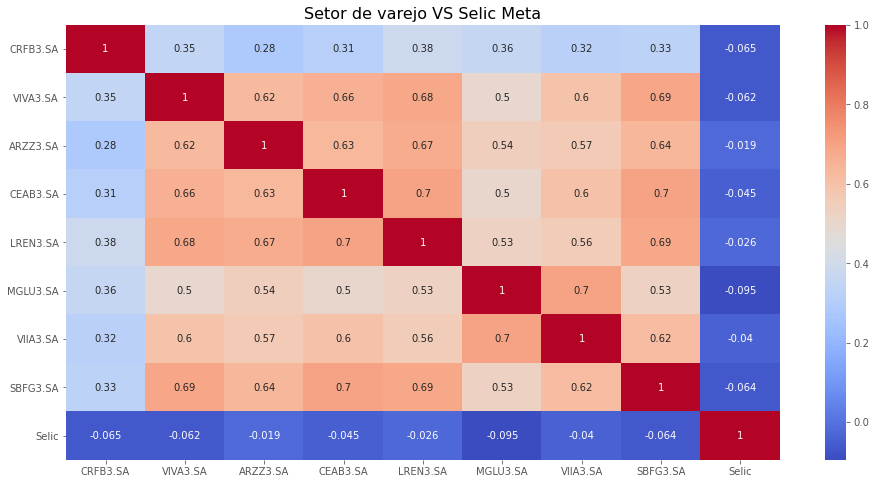

In [56]:
plt.figure(figsize=(16, 8));
ax = plt.axes()
sns.heatmap(corr, ax = ax, annot=True, cmap='coolwarm')

ax.set_title('Setor de varejo VS Selic Meta', fontsize=16)
plt.show()

SCRIPT FINALIZADO!